# Signal Processing
## Week \#4 Lab

### Introduction

In this lab, we focus on transform domain analysis of LTI systems. We investigate frequency response (magnitude and phase) and the locations of the poles and zeros. This notebook uses functions from the NumPy and SciPy packages to assist with our analysis and we create a user-defined function to plot the poles/zeros of an LTI system by first using the coefficients from the difference equation or system function to determine the poles and zeros of the system. We start by investigating a simple moving average finite duration impulse response (FIR) system and will also consider two different infinite duration impulse response (IIR) systems.

### Install Python Packages 

Import the necessary Python modules to implement the lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Frequency Response

#### Moving Average Filter

The $M$-point moving average filter is used to smooth signals:

$$
y[n] = \frac{1}{M+1} \sum\limits_{k=0}^{M} x[n-k]
$$

Note how this system has a finite duration impulse response (FIR):

$$
h[n] = \frac{1}{M+1} \qquad 0\leq n \leq M
$$

The system function is found by taking the $z$-transform of the impulse response:

$$
H(z) = \sum\limits_{k=0}^{M} \frac{1}{M+1} z^{-k} = \frac{1}{M+1} \left( \frac{1-z^{-(M+1)}}{1-z^{-1}} \right) = \frac{1}{M+1} \left( \frac{z^{(M+1)}-1}{z^{M}(z-1)} \right)
$$

The zeros are found from $z^{(M+1)}-1=0$ which has M+1 roots (these are roots of unity: $z^{(M+1)}=1$):

$$
z=e^{j2\pi k/(M+1)} \qquad k=0,1,2,3,...,M
$$

Therefore this system has $M+1$ zeros given above, one pole at $z=1$, and $M$ poles at $z=0$. The $z=1$ pole is canceled by the zero at $z=1$. 

The Fourier transform of the impulse response provides the frequency response of the moving average filter and is the system function evaluated on the unit circle ($z=e^{j\omega}$):

$$
H(e^{j\omega}) = \frac{1}{M+1} \frac{\sin(\omega(M+1)/2)}{\sin(\omega/2)}e^{-j\omega M/2}
$$

We compute and visualize the frequency response with the magnitude response and the phase response of the system as seen below.

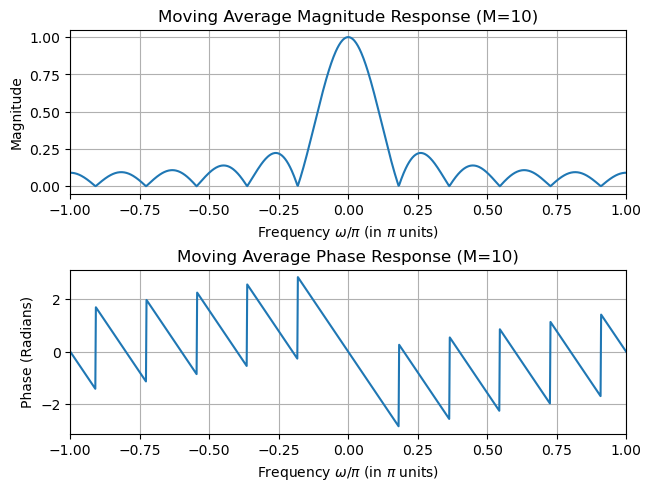

In [2]:
# Determine the frequency response of the moving average filter (M=10)
M = 10 # define filter order
omega = np.linspace(-np.pi, np.pi, 1000) # create normalized frequency vector
H = (1/(M+1)) * np.sin(omega*(M+1)/2) * np.exp(-1j*omega*M/2) / np.sin(omega/2)

# Plot the frequency response of the moving average filter
fig, (ax0, ax1) = plt.subplots(2,1,layout="constrained")
ax0.plot(omega/np.pi, np.abs(H))
ax0.set_title("Moving Average Magnitude Response (M=10)")
ax0.set_xlabel("Frequency $\omega / \pi$ (in $\pi$ units)")
ax0.set_ylabel("Magnitude")
ax0.margins(x=0)
ax0.grid()
ax1.plot(omega/np.pi, np.angle(H))
ax1.set_title("Moving Average Phase Response (M=10)")
ax1.set_xlabel("Frequency $\omega / \pi$ (in $\pi$ units)")
ax1.set_ylabel("Phase (Radians)")
ax1.margins(x=0)
ax1.grid()

Notice how the moving average behaves as a low pass filter with higher frequencies attenuated as seen in the magnitude response. The symmetry of the impulse response leads to (piecewise) linear phase response (there are jumps of $\pi$ in the phase at the zero locations). The horizontal axis in each of these plots is the discrete-time frequency from $-\pi$ to $\pi$. This is also known as the normalized frequency since when working with sampled analog signals, the scaling between discrete-time frequency and continuous-time frequency is:

$$
\omega = \Omega T\\
f = \frac{F}{F_s}
$$

where $\omega$ (radians/sample) and $f$ (cycles/sample) are discrete-time signal frequencies, $\Omega$ (radians/sec) and $F$ (cycles/sec) are continuous-time signal frequencies. The sample interval is $T$ and the sample frequency is $F_s$, reciprocal of the sample interval. The normalized frequency $\omega = \pi$ corresponds to half the sample rate. When we study filter design later in this course, we will learn how to design lowpass filters with a sharper transition band and lower side lobes (better attenuation in the stopband).

#### Computing Frequency Response

Instead of analytically determining the frequency response of a discrete-time system, we can compute the frequency response with __[`scipy.signal.freqz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html)__ which requires the $b$ and $a$ coefficients from the difference equation or equivalently from the numerator and denominator, respectively, of the rational system function. This is demonstrated below with the same moving average filter. Since this is a FIR filter, all of the a coefficients are zero with the exception of $a_0=1$. Notice how this function computes the frequency response over frequencies $0 \leq \omega \leq \pi$ (when the sampling frequency is not passed to function).

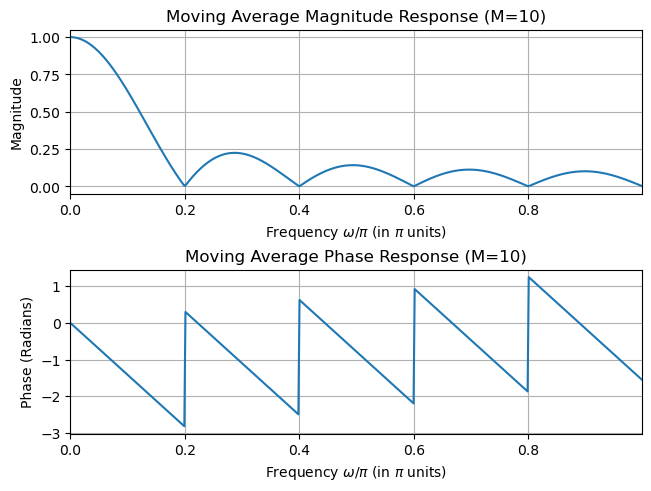

In [3]:
# Use scipy.signal.freqz to compute the frequency response of the moving average filter

M = 10 # define filter order
b = (1/M) * np.ones(M)
omega, H = signal.freqz(b)
fig, (ax0, ax1) = plt.subplots(2,1,layout="constrained")
ax0.plot(omega/np.pi, np.abs(H))
ax0.set_title("Moving Average Magnitude Response (M=10)")
ax0.set_xlabel("Frequency $\omega / \pi$ (in $\pi$ units)")
ax0.set_ylabel("Magnitude")
ax0.margins(x=0)
ax0.grid()
ax1.plot(omega/np.pi, np.angle(H))
ax1.set_title("Moving Average Phase Response (M=10)")
ax1.set_xlabel("Frequency $\omega / \pi$ (in $\pi$ units)")
ax1.set_ylabel("Phase (Radians)")
ax1.margins(x=0)
ax1.grid()

### Pole-Zero Plots

The poles and zeros of a discrete-time system can be computed from the $b$ and $a$ coefficients using __[`scipy.signal.tf2zpk`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2zpk.html)__. Below is a user-defined function to plot the poles and zeros of a linear discrete-time system. The zeros from the moving average filter above are plotted. Observe how this filter has equally spaced zeros on the unit circle with the exception of the zero at $z=1$ that was canceled by a pole at the same location:

$$
z=e^{j2\pi k/(M+1)} \qquad k=1,2,3,...,M
$$

(array([ 0.80901699+0.58778525j,  0.80901699-0.58778525j,
         0.30901699+0.95105652j,  0.30901699-0.95105652j,
        -1.        +0.j        , -0.80901699+0.58778525j,
        -0.80901699-0.58778525j, -0.30901699+0.95105652j,
        -0.30901699-0.95105652j]),
 array([], dtype=float64),
 0.1)

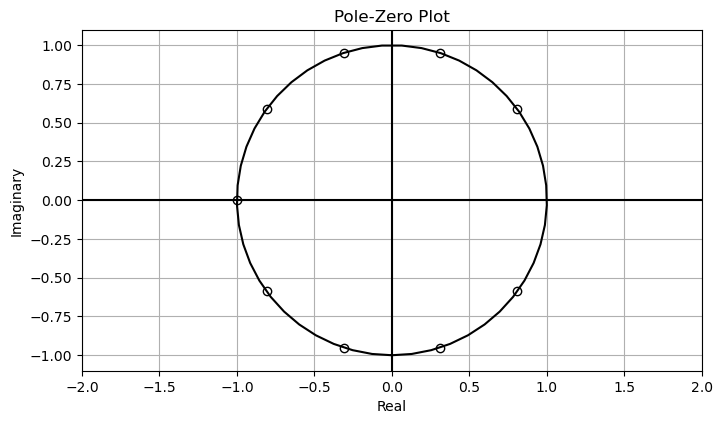

In [4]:
# user defined function for pole-zero plot given the a and b coefficients
def PoleZeroPlot(b, a):
    (zeros, poles, gain) = signal.tf2zpk(b, a)
    angle = np.linspace(-np.pi, np.pi, 50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(poles.real, poles.imag, 'kx', zeros.real, zeros.imag, 'ko',markerfacecolor='none')
    ax.plot(cirx, ciry, 'k-')
    ax.axhline(color='black')
    ax.axvline(color='black')
    ax.set_aspect('equal')
    ax.set_xlim((-2,2))
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.grid()
    ax.set_title("Pole-Zero Plot")
    return (zeros, poles, gain)

PoleZeroPlot(b,1)

### Exercise #1

Consider the moving average filter. Plot the magnitude response, phase response, and pole-zero plot for two different moving average filters with orders higher than the $M=10$ from the example above. Show and explain your results and discuss how they are different and/or similar to the example above.

### Exercise #2

Plot the pole-zero plot, the magnitude response in dB (for example 20 * np.log10(abs(H))), the phase response, and the group delay (__[`scipy.signal.group_delay`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.group_delay.html#scipy.signal.group_delay)__) of the following system.

$$
H(z) = \frac{1 + 1.655z^{-1}+1.655z^{-2} + z^{-3}}{1-1.57z^{-1}+1.264z^{-2} - 0.4 z^{-3}}
$$

Explain what you observe about this system using the transform domain perspective (for example, order, number and locations of poles/zeros, stability, which frequencies pass through this filter, relationship between pole-zero locations and the frequency response, linear or nonlinear phase, etc).

### Exercise #3

Consider the two stable systems with system functions:

$$
H_1(z) = \frac{2(1-z^{-1})(1+0.5z^{-1})}{(1-0.8e^{j\pi/4}z^{-1})(1-0.8e^{-j\pi/4}z^{-1})}
$$

and 

$$
H_2(z) = \frac{(1-z^{-1})(1+2z^{-1})}{(1-0.8e^{j\pi/4}z^{-1})(1-0.8e^{-j\pi/4}z^{-1})}
$$

Since these system functions are in factored form, the poles, zeros, and system gain can be identified. The coefficients of the transfer function can be found with __[`scipy.signal.zpk2tf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.zpk2tf.html#scipy-signal-zpk2tf)__. Plot the poles/zeros and frequency response for each of these systems. Discuss the similarities and differences in your results. Which one these systems is a minimum-phase system?
